> # Spam Classification

## I- Package

In [374]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

import wordcloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

## MLPC
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV

%matplotlib inline

## II- A. Part 01: extra information based classification

In [103]:
ei_data = pd.read_csv('./data/spam_email_dataset.csv')
ei_data.head()

,Email,Subject,Sender,Recipient,Date,Time,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org,13-02-2023,04:13,3,0,191,32,3,3,0,11,1,1
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net,09-08-2023,06:15,3,9,45,1,2,1,2,8,2,1
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net,16-05-2023,01:32,3,9,52,1,4,0,2,10,1,1
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com,25-04-2023,14:50,2,3,75,6,0,2,0,8,2,0
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com,11-07-2023,21:44,3,5,299,279,0,2,0,6,1,1


In [104]:
ei_data.describe()

,Attachments,Link Count,Word Count,Uppercase Count,Exclamation Count,Question Count,Dollar Count,Punctuation Count,HTML Tags Count,Spam Indicator
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,1.497833,5.005500,153.269500,75.997667,2.481833,1.486000,0.989500,7.549667,2.528833,0.497000
std,1.125555,3.166092,83.135747,64.735568,1.717895,1.118785,0.812301,4.624619,1.703522,0.500033
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,83.000000,23.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000
50%,1.000000,5.000000,154.000000,59.000000,2.000000,1.000000,1.000000,8.000000,3.000000,0.000000
75%,3.000000,8.000000,223.000000,114.000000,4.000000,2.000000,2.000000,12.000000,4.000000,1.000000
max,3.000000,10.000000,300.000000,300.000000,5.000000,3.000000,2.000000,15.000000,5.000000,1.000000


## A.1 Data Preprocessing

In [105]:
# convert time to seconds
def convert_time(time):
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 

ei_data['Time'] = ei_data['Time'].apply(convert_time)

In [156]:
ei_num_data = ei_data.iloc[:, 5:]
ei_str_data = ei_data.iloc[:, :4]

subject = ei_str_data['Subject']
ei_str_data.head()

,Email,Subject,Sender,Recipient
0,mikerusso@example.net,Even hotel community church.,emilyscott@example.org,gregorysmith@example.org
1,waynebailey@example.org,Try themselves guess fight white agreement thu...,annwhite@example.net,gonzalezdaniel@example.net
2,jill43@example.com,Environmental commercial off seem any conference.,david88@example.net,michellebaker@example.net
3,johnsonkaren@example.org,Smile real TV father commercial day increase.,lindaalvarez@example.com,schroedertodd@example.com
4,markwilson@example.org,Fast stage he oil institution.,vstafford@example.com,emilywilliams@example.com


In [155]:
ei_num_data.columns

Index(['Time', 'Attachments', 'Link Count', 'Word Count', 'Uppercase Count',
       'Exclamation Count', 'Question Count', 'Dollar Count',
       'Punctuation Count', 'HTML Tags Count', 'Spam Indicator'],
      dtype='object')

<Axes: >

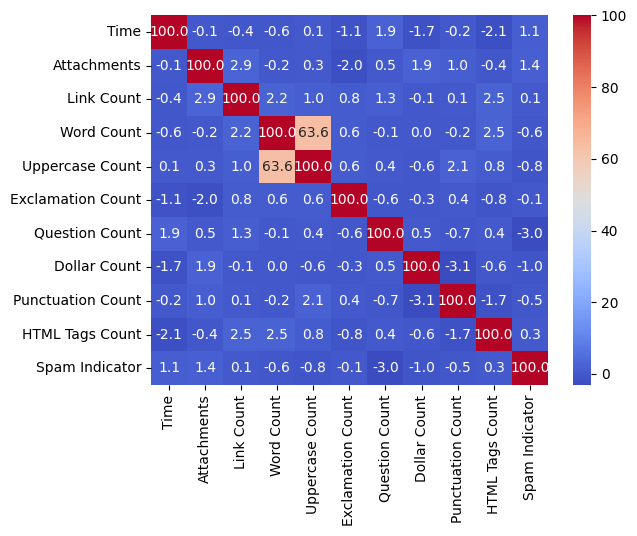

In [145]:
sns.heatmap(ei_num_data.corr()*100, annot=True,fmt=".1f",cmap='coolwarm')

### A.1.2 Subject prossising

In [159]:
spam_subject = []
ham_subject = []

for i in range(len(subject)):
    if ei_num_data["Spam Indicator"][i] == 1:
        spam_subject.append(subject[i])
    else:
        ham_subject.append(subject[i])

Spam Subject:


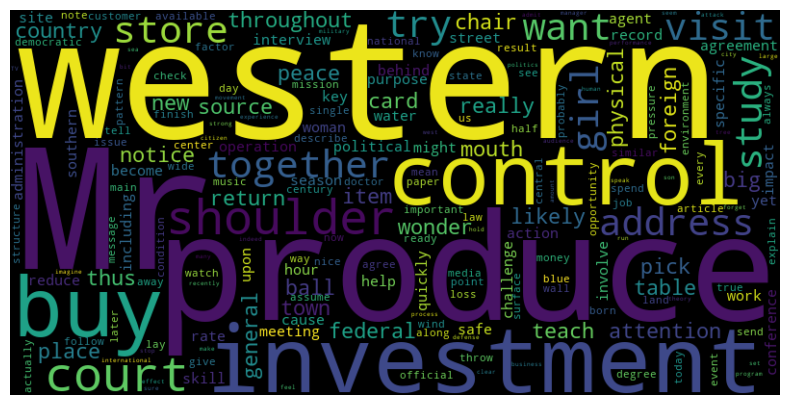

In [169]:
print("\033[91mSpam Subject:\033[0m")
wc = wordcloud.WordCloud(width=800, height=400, max_words=200).generate(' '.join(spam_subject))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Spam Subject:


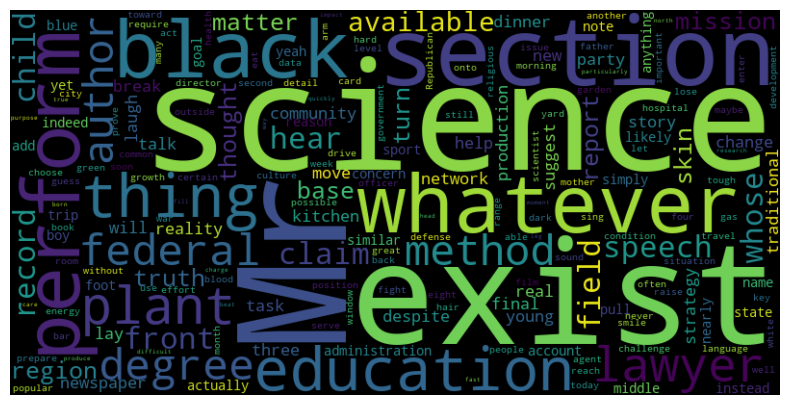

In [170]:
print("\033[92mSpam Subject:\033[0m")
wc = wordcloud.WordCloud(width=800, height=400, max_words=200).generate(' '.join(ham_subject))
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [234]:
tokenized_subject = []
for i in range(len(subject)):
    tokenized_subject.append(word_tokenize(subject[i]))

tokenized_subject[:5]

[['Even', 'hotel', 'community', 'church', '.'],
 ['Try',
  'themselves',
  'guess',
  'fight',
  'white',
  'agreement',
  'thus',
  'although',
  '.'],
 ['Environmental', 'commercial', 'off', 'seem', 'any', 'conference', '.'],
 ['Smile', 'real', 'TV', 'father', 'commercial', 'day', 'increase', '.'],
 ['Fast', 'stage', 'he', 'oil', 'institution', '.']]

In [237]:
from nltk.corpus import stopwords

stopwords_set = set(stopwords.words('english'))

In [239]:
removed_stopwords = []
for i in range(len(tokenized_subject)):
    removed_stopwords.append([word for word in tokenized_subject[i] if word.lower() not in stopwords_set])

In [241]:
# removin the punctuation marks from the tokenized subject
import string

removed_punctuation = []

for i in range(len(removed_stopwords)):
    removed_punctuation.append([word for word in removed_stopwords[i] if word not in string.punctuation])
    
removed_punctuation[:5]
    

[['Even', 'hotel', 'community', 'church'],
 ['Try', 'guess', 'fight', 'white', 'agreement', 'thus', 'although'],
 ['Environmental', 'commercial', 'seem', 'conference'],
 ['Smile', 'real', 'TV', 'father', 'commercial', 'day', 'increase'],
 ['Fast', 'stage', 'oil', 'institution']]

In [242]:
# all words to lower case
lower_case = []

for i in range(len(removed_punctuation)):
    lower_case.append([word.lower() for word in removed_punctuation[i]])

lower_case[:5]

[['even', 'hotel', 'community', 'church'],
 ['try', 'guess', 'fight', 'white', 'agreement', 'thus', 'although'],
 ['environmental', 'commercial', 'seem', 'conference'],
 ['smile', 'real', 'tv', 'father', 'commercial', 'day', 'increase'],
 ['fast', 'stage', 'oil', 'institution']]

In [246]:
# spam from lower_case
spam_lower_case = []
ham_lower_case = []

for i in range(len(lower_case)):
    if ei_num_data["Spam Indicator"][i] == 1:
        spam_lower_case.append(lower_case[i])
    else:
        ham_lower_case.append(lower_case[i])

In [261]:
# vectorizing the words
from sklearn.feature_extraction.text import CountVectorizer


In [253]:
# stimming the words
ps = PorterStemmer()

stemmed_words = []

for i in range(len(lower_case)):
    stemmed_words.append([ps.stem(word) for word in lower_case[i]])
    
stemmed_words[:5]

[['even', 'hotel', 'commun', 'church'],
 ['tri', 'guess', 'fight', 'white', 'agreement', 'thu', 'although'],
 ['environment', 'commerci', 'seem', 'confer'],
 ['smile', 'real', 'tv', 'father', 'commerci', 'day', 'increas'],
 ['fast', 'stage', 'oil', 'institut']]

In [254]:
st_vectorizer = CountVectorizer()
st_vectorizer.fit([' '.join(words) for words in stemmed_words])

CountVectorizer()

In [256]:
# toarray() method is used to convert the vectorized data into an array
st_vectorized_data = st_vectorizer.transform([' '.join(words) for words in stemmed_words])
st_vectorized_data.toarray().shape

(6000, 839)

In [263]:
vec_arr = st_vectorized_data.toarray()

In [269]:
df_vec_arr = pd.DataFrame(vec_arr, columns=st_vectorizer.get_feature_names_out())

In [270]:
df_vec_arr.head()

,abil,abl,accept,accord,account,across,act,action,activ,actual,...,would,write,writer,wrong,yard,ye,yeah,year,yet,young
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
# splitting the data into training and testing data
X_subject = df_vec_arr
y_subject = ei_num_data['Spam Indicator']


X_train, X_test, y_train, y_test = train_test_split(X_subject, y_subject, test_size=0.2, random_state=123)


In [328]:
ei_num_data_all = ei_num_data.drop('Spam Indicator', axis=1)
X_all = pd.concat([X_subject,ei_num_data_all], axis=1)
y_all = ei_num_data['Spam Indicator']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=123)

## A.1.3 Model 01 : XGBoost

In [329]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [330]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.46      0.49       607
           1       0.50      0.56      0.53       593

    accuracy                           0.51      1200
   macro avg       0.51      0.51      0.51      1200
weighted avg       0.51      0.51      0.51      1200



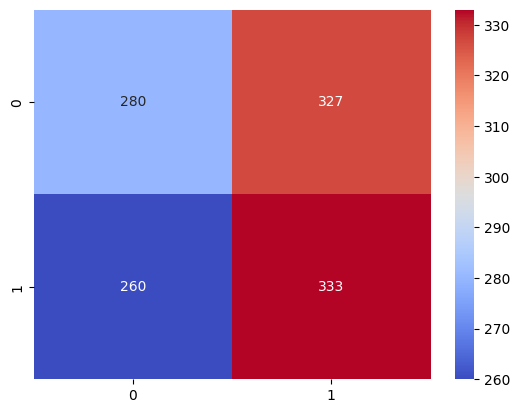

In [331]:
heatmap = sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='coolwarm')

In [332]:
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [500, 700, 1000],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9]
}

In [338]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# # Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [337]:
best_params = grid_search.best_params_

{'learning_rate': 0.001, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.8}


In [340]:
model = XGBClassifier(learning_rate= 0.001, max_depth= 4, n_estimators= 500, subsample= 0.8)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [341]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.89      0.65       607
           1       0.49      0.10      0.17       593

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.41      1200
weighted avg       0.50      0.50      0.41      1200



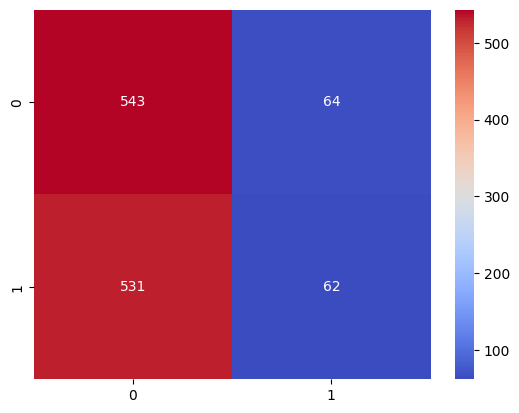

In [342]:
heatmap = sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='coolwarm')

## A.1.4 Model 02 : Multy Layer Perceptron

In [408]:
model2 = MLPClassifier(activation='identity', hidden_layer_sizes=(2, 3) ,learning_rate='constant' ,learning_rate_init=0.0001,solver='adam')
model2.fit(X_train, y_train)

c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='identity', hidden_layer_sizes=(2, 3),
              learning_rate_init=0.0001)

In [409]:
y_pred2 = model2.predict(X_test)
report = classification_report(y_test, y_pred2)

In [411]:
print(report)

              precision    recall  f1-score   support

           0       0.50      0.51      0.51       607
           1       0.49      0.48      0.48       593

    accuracy                           0.50      1200
   macro avg       0.50      0.50      0.50      1200
weighted avg       0.50      0.50      0.50      1200



In [405]:
param_grid2 = {
    'hidden_layer_sizes': [(2,1), (2,2), (2,3),(2,4),(2,5)],
}


In [406]:
grid_search2 = GridSearchCV(estimator=model2, param_grid=param_grid2, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search2.fit(X_train, y_train)

# # Get the best parameters and model
best_params2 = grid_search2.best_params_
best_model2 = grid_search2.best_estimator_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


c:\Users\Ali.DE_Bouakaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [407]:
print(grid_search2.best_estimator_)

MLPClassifier(activation='identity', hidden_layer_sizes=(2, 3),
              learning_rate_init=0.0001)


# III- conclusion 

the rusult of the 2 models is so bad, because the data is not enough to train the model, and the quality of the data is not good, so we need to use a better data and more data to train the model.